In [1]:
# import matplotlib.pyplot as plt

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import astropy.units as u

from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map

ModuleNotFoundError: No module named 'sunpy'

In [4]:
import subprocess
while True: #downloads and installs any missing packages
    try: #try to import
        import ftplib, tarfile, pickle, os, shutil
        break
    except ModuleNotFoundError as e: #if any package is missing, download then try again
        module = str(e)[17:-1].replace('-', '_')
        subprocess.call(["python", "-m", "pip", "install", "--trusted-host", "pypi.org", "--trusted-host", "files.pythonhosted.org", module])

querytype = "SRS"
folder = "/Users/justinhou/Documents/data/ftp_download_%s" % (querytype)
with tarfile.open(f"/Users/justinhou/Documents/data/ftp_download_{querytype}.tar.gz", "r") as f:
    f.extractall(folder)
    print(f)


In [135]:
def set_proxy(proxy):
    import os
    os.environ['http_proxy'] = proxy
    os.environ['HTTP_PROXY'] = proxy
    os.environ['https_proxy'] = proxy
    os.environ['HTTPS_PROXY'] = proxy
    os.environ['ftp_proxy'] = proxy
    os.environ['FTP_PROXY'] = proxy
set_proxy("http://proxy-zsgov.external.lmco.com:80")

In [47]:
result = Fido.search(a.Time('2020/01/20 00:00:00', '2020/01/20 00:01:00'),
                     a.Instrument.aia)
print(result)

Results from 1 Provider:

41 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 2.779 Gbyte

       Start Time               End Time        Source Instrument    Wavelength    Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size                              Info                          
                                                                      Angstrom                                                                         Mibyte                                                           
----------------------- ----------------------- ------ ---------- ---------------- -------- --------- -------- ------------ ------------- ----------- -------- ---------------------------------------------------------
2020-01-20 00:00:00.000 2020-01-20 00:00:01.000    SDO        AIA   335.0 .. 335.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844 AIA level 1, 4096x4096 [2.901 exposure] [100.00 per

In [13]:
result = Fido.search(a.Time('2020/01/20 00:00:00', '2020/01/20 00:30:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
print(result)

Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source Instrument    Wavelength    Provider      Physobs       Wavetype Extent Width Extent Length Extent Type   Size          Info       
                                                                      Angstrom                                                                                  Mibyte                    
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------------ -------- ------------ ------------- ----------- -------- ------------------
2020-01-20 00:00:22.000 2020-01-20 00:00:23.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096    FULLDISK -0.00098 45sec. Magnetogram




In [14]:
jsoc_result = result[0]
print(jsoc_result.show('T_REC', 'CROTA2'))


Start Time End Time Source Instrument Wavelength Provider Physobs Wavetype Extent Width Extent Length Extent Type  Size  Info fileid
                                       Angstrom                                                                   Mibyte            
---------- -------- ------ ---------- ---------- -------- ------- -------- ------------ ------------- ----------- ------ ---- ------


In [15]:
downloaded_file = Fido.fetch(result)
print(downloaded_file)

Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.59s/file]

['/Users/jhou/sunpy/data/hmi_m_45s_2020_01_20_00_01_30_tai_magnetogram.fits']


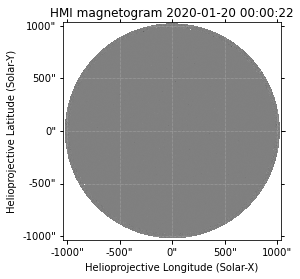

In [16]:


hmi_map = sunpy.map.Map(downloaded_file[0])
hmi_rotated = hmi_map.rotate(order=3)

plt.figure()
hmi_rotated.plot()
plt.show()

In [17]:
# top_right = SkyCoord(0 * u.arcsec, -200 * u.arcsec, frame=hmi_rotated.coordinate_frame)
# bottom_left = SkyCoord(-900 * u.arcsec, -900 * u.arcsec, frame=hmi_rotated.coordinate_frame)
# swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)

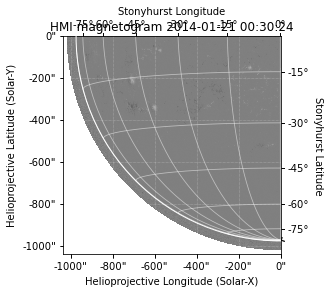

In [34]:
top_right = SkyCoord(0 * u.arcsec, -200 * u.arcsec, frame=hmi_rotated.coordinate_frame)
bottom_left = SkyCoord(-800 * u.arcsec, -900 * u.arcsec, frame=hmi_rotated.coordinate_frame)
swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
plt.figure()
swap_submap.plot()
swap_submap.draw_limb()
swap_submap.draw_grid()
plt.show()

Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source Instrument    Wavelength    Provider      Physobs       Wavetype Extent Width Extent Length Extent Type   Size          Info       
                                                                      Angstrom                                                                                  Mibyte                    
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------------ -------- ------------ ------------- ----------- -------- ------------------
2020-01-20 00:00:22.000 2020-01-20 00:00:23.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096    FULLDISK -0.00098 45sec. Magnetogram




Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/file]


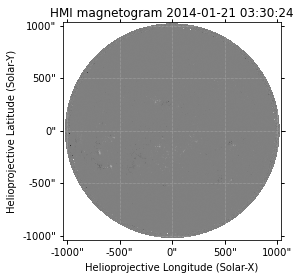

In [43]:
result2 = Fido.search(a.Time('2014/01/21 03:30:00', '2014/01/21 03:31:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
print(result)
downloaded_file = Fido.fetch(result2)
hmi_map = sunpy.map.Map(downloaded_file[0])
hmi_rotated = hmi_map.rotate(order=3)

plt.figure()
hmi_rotated.plot()
plt.show()

Results from 1 Provider:

1 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source Instrument    Wavelength    Provider      Physobs       Wavetype Extent Width Extent Length Extent Type   Size          Info       
                                                                      Angstrom                                                                                  Mibyte                    
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------------ -------- ------------ ------------- ----------- -------- ------------------
2010-10-16 19:12:31.000 2010-10-16 19:12:32.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096    FULLDISK -0.00098 45sec. Magnetogram




Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.06file/s]


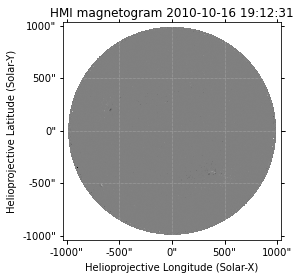

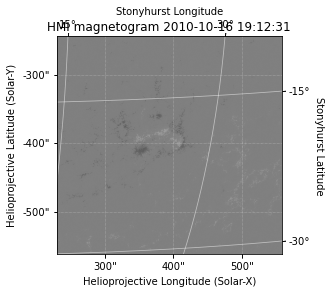

In [52]:
from sunpy.coordinates import Helioprojective, HeliographicStonyhurst #USE STONYHURST solarmonitor.org SEND NABIL AN EMAIL ABT ERROR

result2 = Fido.search(a.Time('2010/10/16 19:12:00', '2010/10/16 19:13:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
print(result2)
downloaded_file = Fido.fetch(result2)
hmi_map = sunpy.map.Map(downloaded_file[0])
hmi_rotated = hmi_map.rotate(order=3)

plt.figure()
hmi_rotated.plot()
plt.show()

#S20W26
top_right = SkyCoord(36 * u.deg, -10 * u.deg, frame=HeliographicStonyhurst)
bottom_left = SkyCoord(16 * u.deg, -30 * u.deg, frame=HeliographicStonyhurst)
swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
plt.figure()
swap_submap.plot()
swap_submap.draw_limb()
swap_submap.draw_grid()
plt.show()

Results from 1 Provider:

22 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search

       Start Time               End Time        Source Instrument    Wavelength    Provider      Physobs       Wavetype Extent Width Extent Length Extent Type   Size          Info       
                                                                      Angstrom                                                                                  Mibyte                    
----------------------- ----------------------- ------ ---------- ---------------- -------- ------------------ -------- ------------ ------------- ----------- -------- ------------------
2012-03-10 17:44:00.000 2012-03-10 17:44:01.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096    FULLDISK -0.00098 45sec. Magnetogram
2012-03-10 17:44:45.000 2012-03-10 17:44:46.000    SDO        HMI 6173.0 .. 6174.0     JSOC LOS_magnetic_field   NARROW         4096          4096 

Files Downloaded: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:10<00:00,  2.18file/s]


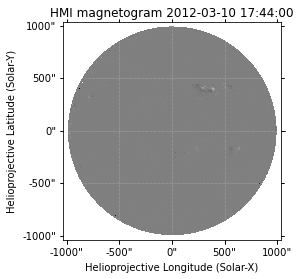

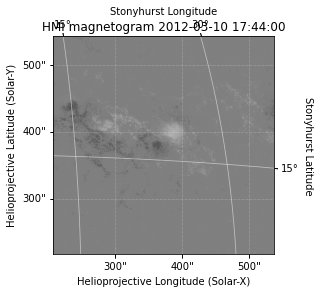

In [61]:
from sunpy.coordinates import Helioprojective, HeliographicStonyhurst #USE STONYHURST solarmonitor.org SEND NABIL AN EMAIL ABT ERROR


result2 = Fido.search(a.Time('2012/03/10 17:44:00', '2012/03/10 18:00:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
print(result2)
downloaded_file = Fido.fetch(result2)
sorted_files = sorted(downloaded_file)

hmi_map = sunpy.map.Map(sorted_files[0])
hmi_rotated = hmi_map.rotate(order=3)

plt.figure()
hmi_rotated.plot()
plt.show()

#N17W24
top_right = SkyCoord(34 * u.deg, 27 * u.deg, frame=HeliographicStonyhurst)
bottom_left = SkyCoord(14 * u.deg, 7 * u.deg, frame=HeliographicStonyhurst)
swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
plt.figure()
swap_submap.plot()
swap_submap.draw_limb()
swap_submap.draw_grid()
plt.show()

In [ ]:
result2 = Fido.search(a.Time('2012/03/10 17:44:00', '2012/03/10 18:00:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
print(result2)
downloaded_file = Fido.fetch(result2)
sorted_files = sorted(downloaded_file)

hmi_map = sunpy.map.Map(sorted_files[0])
hmi_rotated = hmi_map.rotate(order=3)

plt.figure()
hmi_rotated.plot()
plt.show()

#N17W24
top_right = SkyCoord(34 * u.deg, 27 * u.deg, frame=HeliographicStonyhurst)
bottom_left = SkyCoord(14 * u.deg, 7 * u.deg, frame=HeliographicStonyhurst)
swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
plt.figure()
swap_submap.plot()
swap_submap.draw_limb()
swap_submap.draw_grid()
plt.show()

'012'

In [356]:
def set_proxy(proxy):
    import os
    os.environ['http_proxy'] = proxy
    os.environ['HTTP_PROXY'] = proxy
    os.environ['https_proxy'] = proxy
    os.environ['HTTPS_PROXY'] = proxy
    os.environ['ftp_proxy'] = proxy
    os.environ['FTP_PROXY'] = proxy
set_proxy("http://proxy-zsgov.external.lmco.com:80")

In [358]:
import sunpy.coordinates
from astropy.coordinates import SkyCoord
import math
import astropy.units as u
import sunpy.data.sample
import sunpy.map

from sunpy.physics.differential_rotation import diff_rot, solar_rotate_coordinate
from sunpy.time import parse_time
# import astropy.units as u

from sunpy.coordinates import Helioprojective, HeliographicStonyhurst #USE STONYHURST solarmonitor.org SEND NABIL AN EMAIL ABT ERROR
# from astropy.coordinates import SkyCoord
from sunpy.coordinates import RotatedSunFrame

import datetime as dt
from datetime import datetime, timedelta

def rotate2(point, starttime, duration):
    lat = int(point[1:3]) if point[0] == "N" else int(point[1:3]) * -1
    long = int(point[4:6]) if point[3] == "W" else int(point[4:6]) * -1
    hrs = duration*u.hour#(int(duration[0:2])+int(duration[2:4])/60)*u.hour
    if hrs == 0:
        return point
    
    start_time = starttime
    point = SkyCoord(long*u.deg, lat*u.deg, obstime = start_time, frame=HeliographicStonyhurst)
    # print(point)
    durations = [hrs]*u.hour#np.concatenate([range(-5, 0), range(1, 6)]) * u.day
    diffrot_point = RotatedSunFrame(base=point, duration=durations)
    # print(diffrot_point)
    transformed_diffrot_point = diffrot_point.transform_to(HeliographicStonyhurst)
    # print(transformed_diffrot_point[0])
    return transformed_diffrot_point.lon.degree, transformed_diffrot_point.lat.degree

def makeMovie(date, time, location, intvl, times, mag): #interval in hours, convert into helioprojective or cartesian heliographic
    time = time.zfill(4)
    hrinit = time[0:2]
    mninit = time[2:4]
    hrs = (int(time[0:2])+int(time[2:4])/60)
    files = []
    date = dt.datetime(date.year, date.month, date.day, int(hrinit), int(mninit))
    
    for i in range(times):
        yr = date.year
        mnth = date.month
        day = date.day
        hr = date.hour
        mn = date.minute
        print(yr, mnth, day, hr, mn,int(mn)+1)
        result2 = Fido.search(a.Time(f'{yr}/{mnth}/{day} {hr}:{mn}:00', f'{yr}/{mnth}/{day} {hr}:{int(mn)+1}:00'), 
                     a.Instrument.hmi, a.Physobs.los_magnetic_field) # doesn't work if min is 59
        downloaded_file = Fido.fetch(result2)
        files.append(downloaded_file)
        
        td = timedelta(hours=intvl)
        # your calculated date
        print(date, td)
        date = date + td
        # day += 1
    
    sorted_files = sorted(files)

    for i in range(times):
        lon, lat = rotate2(location, date, hrs+intvl*i)
        print(lon, lat)
        hmi_map = sunpy.map.Map(sorted_files[i][0])
        hmi_rotated = hmi_map.rotate(order=3)
        top_right = SkyCoord((lon+10) * u.deg, (lat+10) * u.deg, frame=HeliographicStonyhurst)
        bottom_left = SkyCoord((lon-10) * u.deg, (lat-10) * u.deg, frame=HeliographicStonyhurst)
        swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
        plt.figure()
        swap_submap.plot()
        swap_submap.draw_limb()
        swap_submap.draw_grid()
        output_dir = "hmiIMGs"
        fn = f"{location}_{mag}_{i}.png"
        plt.savefig(("{}/"+fn).format(output_dir)) #eventually change to save in certain directory
        plt.show()

# makeMovie(dt.datetime(2012, 3, 7), "0024", "N18E31", .2, 600, "X54")
makeMovie(dt.datetime(2012, 3, 7), "0024", "N18E31", 12, 10, "X54") # 3hr cadence or 12 min cadenc, use drms, add symbol of flare
# '2012/03/10 17:44:00'
        


2012 3 7 0 24 25


Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/file]


2012-03-07 00:24:00 12:00:00
2012 3 7 12 24 25


Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:43<00:00, 43.04s/file]


2012-03-07 12:24:00 12:00:00
2012 3 8 0 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:10<?, ?file/s]


2012-03-08 00:24:00 12:00:00
2012 3 8 12 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:30<?, ?file/s]


2012-03-08 12:24:00 12:00:00
2012 3 9 0 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:14<?, ?file/s]


2012-03-09 00:24:00 12:00:00
2012 3 9 12 24 25


Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:32<00:00, 32.90s/file]


2012-03-09 12:24:00 12:00:00
2012 3 10 0 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:02<?, ?file/s]


2012-03-10 00:24:00 12:00:00
2012 3 10 12 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:30<?, ?file/s]


2012-03-10 12:24:00 12:00:00
2012 3 11 0 24 25


Files Downloaded:   0%|                                                                                                                                                                                                                                                                                                                           | 0/1 [01:12<?, ?file/s]


2012-03-11 00:24:00 12:00:00
2012 3 11 12 24 25


Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:33<00:00, 33.70s/file]


2012-03-11 12:24:00 12:00:00
[-30.76487827] [18.]


IndexError: list index out of range

In [ ]:
import sunpy.coordinates
from astropy.coordinates import SkyCoord
import math
import astropy.units as u
import sunpy.data.sample
import sunpy.map

from sunpy.physics.differential_rotation import diff_rot, solar_rotate_coordinate
from sunpy.time import parse_time
# import astropy.units as u

from sunpy.coordinates import Helioprojective, HeliographicStonyhurst #USE STONYHURST solarmonitor.org SEND NABIL AN EMAIL ABT ERROR
# from astropy.coordinates import SkyCoord
from sunpy.coordinates import RotatedSunFrame

import datetime as dt
from datetime import datetime, timedelta

def rotate2(point, starttime, duration):
    lat = int(point[1:3]) if point[0] == "N" else int(point[1:3]) * -1
    long = int(point[4:6]) if point[3] == "W" else int(point[4:6]) * -1
    hrs = duration*u.hour#(int(duration[0:2])+int(duration[2:4])/60)*u.hour
    if hrs == 0:
        return point
    
    start_time = starttime
    point = SkyCoord(long*u.deg, lat*u.deg, obstime = start_time, frame=HeliographicStonyhurst)
    # print(point)
    durations = [hrs]*u.hour#np.concatenate([range(-5, 0), range(1, 6)]) * u.day
    diffrot_point = RotatedSunFrame(base=point, duration=durations)
    # print(diffrot_point)
    transformed_diffrot_point = diffrot_point.transform_to(HeliographicStonyhurst)
    # print(transformed_diffrot_point[0])
    return transformed_diffrot_point.lon.degree, transformed_diffrot_point.lat.degree

def makeMovie(date, time, location, intvl, times, mag): #interval in hours, convert into helioprojective or cartesian heliographic
    time = time.zfill(4)
    hrinit = time[0:2]
    mninit = time[2:4]
    hrs = (int(time[0:2])+int(time[2:4])/60)
    files = []
    date = dt.datetime(date.year, date.month, date.day, int(hrinit), int(mninit))
    
    for i in range(times):
        yr = date.year
        mnth = date.month
        day = date.day
        hr = date.hour
        mn = date.minute
        print(yr, mnth, day, hr, mn,int(mn)+1)
        result2 = Fido.search(a.Time(f'{yr}/{mnth}/{day} {hr}:{mn}:00', f'{yr}/{mnth}/{day} {hr}:{int(mn)+1}:00'), 
                     a.Instrument.hmi, a.Physobs.los_magnetic_field) # doesn't work if min is 59
        downloaded_file = Fido.fetch(result2)
        files.append(downloaded_file)
        
        td = timedelta(hours=intvl)
        # your calculated date
        print(date, td)
        date = date + td
        # day += 1
    
    sorted_files = sorted(files)

    for i in range(times):
        lon, lat = rotate2(location, date, hrs+intvl*i)
        print(lon, lat)
        hmi_map = sunpy.map.Map(sorted_files[i][0])
        hmi_rotated = hmi_map.rotate(order=3)
        top_right = SkyCoord((lon+10) * u.deg, (lat+10) * u.deg, frame=HeliographicStonyhurst)
        bottom_left = SkyCoord((lon-10) * u.deg, (lat-10) * u.deg, frame=HeliographicStonyhurst)
        swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
        plt.figure()
        swap_submap.plot()
        swap_submap.draw_limb()
        swap_submap.draw_grid()
        output_dir = "hmiIMGs"
        fn = f"{location}_{mag}_{i}.png"
        plt.savefig(("{}/"+fn).format(output_dir)) #eventually change to save in certain directory
        plt.show()
        
makeMovie(dt.datetime(2012, 3, 7), "0024", "N18E31", 12, 10, "X54") # 3hr cadence or 12 min cadenc, use drms, add symbol of flare
# '2012/03/10 17:44:00'
        


In [ ]:
import cv2
import os

image_folder = 'hmiIMGs'
video_name = 'test1.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

ModuleNotFoundError: No module named 'cv2'

In [104]:
import drms

In [59]:
sorted(downloaded_file)

['/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_45_00_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_45_45_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_46_30_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_47_15_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_48_00_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_48_45_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_49_30_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_50_15_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_51_00_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_51_45_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_52_30_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_53_15_tai_magnetogram.fits',
 '/Users/jhou/sunpy/data/hmi_m_45s_2012_03_10_17_54_00_tai_magne

In [83]:
from datetime import datetime, timedelta
dt = datetime.now()
td = timedelta(hours=4)
# your calculated date
my_date = dt + td
my_date

datetime.datetime(2022, 9, 9, 21, 2, 21, 359417)

In [221]:
import drms
from astropy.io import fits
jsoc = drms.Client()
ds = jsoc.series(r"aia.lev1_euv_12s") # Level 1.0
si = jsoc.info(ds[0])
print(si.segments)
#Choose wavelnth
wavelnth = 94 
#2012, 3, 7
k, s = jsoc.query('{0:s}[2012-03-07T00:24/12s][WAVELNTH = {1:03d}]'.format(ds[0],wavelnth), 
                  key='DATE, T_OBS, FSN, DATAMEAN, TEMPCCD, EXPTIME',seg=['image','spikes'])
# s.head() if you want to look at contents of s
# dummy, spikes = fits.open('http://jsoc.stanford.edu'+s['spikes'][0])
dummy, image = fits.open('http://jsoc.stanford.edu'+s['image'][0])

image.verify('fix')


       type units       protocol  dims                    note
name                                                          
image   int  None  link via lev1  None       AIA level 1 image
spikes  int  None  link via lev1  None  Cosmic ray information


 [astropy.io.fits.verify]


In [244]:
'{0:s}[2012-03-07T00:24/12s][WAVELNTH = {1:03d}]'.format(ds[0],wavelnth)

'hmi.M_720s[2012-03-07T00:24/12s][WAVELNTH = 094]'

In [217]:
s

,image,spikes
0,/SUM37/D304236608/S00000/image_lev1.fits,/SUM37/D304236608/S00000/spikes.fits


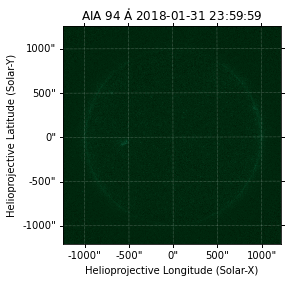

In [216]:
aia_map = sunpy.map.Map('http://jsoc.stanford.edu'+s['image'][0])
plt.figure()
aia_map.plot()
plt.show()

In [285]:
from sunpy.net import attrs as a

jsoc = drms.Client()

ds = jsoc.series(r"hmi.M_720s")  # Level 1.0
#hmi.sharp_720s[1449][2012.03.07_00:12:00_TAI-2012.03.10_00:12:00_TAI]{magnetogram}
sharpnum = "1449"
d1 = "2012.03.07_00:12:00"
d2 = "2012.03.10_00:12:00"

    
query, s = jsoc.query('hmi.sharp_720s[{1:s}][{2:s}_TAI-{3:s}_TAI]'.format(ds[0],sharpnum, d1, d2), 
                  key='HARPNUM, T_REC',
                      seg=['magnetogram'])

# Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'),
#             a.jsoc.Series('hmi.v_45s') | a.jsoc.Series('aia.lev1_euv_12s'),
#             a.jsoc.Notify('jhou@lmsal.com'))
# downloaded_files = Fido.fetch(res)  
    
# query, s = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str),
#                       key='DATE, DATE-OBS, T_REC, T_OBS,  CRPIX1, CRPIX2, CRVAL1, CRVAL2, CDELT1, CDELT2, CROTA2,RSUN_OBS, DSUN_OBS, DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS',
#                       seg=['magnetogram', 'spikes'])
# query1 = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str), seg=['magnetogram'])
# hmi_sample_header = sunpy.map.Map('hmi_m_45s_2011_02_15_01_58_30_tai_magnetogram.fits').meta

In [286]:
s

,magnetogram
0,/SUM95/D1039223668/S00000/magnetogram.fits
1,/SUM87/D1039223753/S00000/magnetogram.fits
2,/SUM94/D1039223839/S00000/magnetogram.fits
3,/SUM86/D1039223912/S00000/magnetogram.fits
4,/SUM99/D1039223985/S00000/magnetogram.fits
...,...
336,/SUM86/D1039249636/S00000/magnetogram.fits
337,/SUM91/D1039249709/S00000/magnetogram.fits
338,/SUM95/D1039249842/S00000/magnetogram.fits
339,/SUM91/D1039249911/S00000/magnetogram.fits


In [233]:
'hmi.sharp_720s[{1:s}][{2:s}_TAI-{3:s}_TAI]'.format(ds[0],sharpnum, d1, d2)
# hmi.sharp_720s[1449][2012.03.07_00:12:00_TAI-2012.03.10_00:12:00_TAI]{magnetogram}

'hmi.sharp_720s[1449][2012.03.07_00:12:00_TAI-2012.03.10_00:12:00_TAI]'

In [249]:
'http://jsoc.stanford.edu'+s['magnetogram'][0]

'http://jsoc.stanford.edu/SUM95/D1039223668/S00000/magnetogram.fits'

In [266]:
data

In [269]:
import sunpy.map
from sunpy.io import fits
from astropy.io import fits
import sunpy.data.sample  

# hmi_map = sunpy.map.Map('http://jsoc.stanford.edu'+s['magnetogram'][0])
data, header = sunpy.io.fits.read('http://jsoc.stanford.edu'+s['magnetogram'][0]) 
header['cunit1'] = 'arcsec' 
header['cunit2'] = 'arcsec' 
hmi_map = sunpy.map.Map(data, header) 
plt.figure()
hmi_map.plot()
plt.show()

MapMetaValidationError: Image coordinate units for axis 1 not present in metadata.
Image coordinate units for axis 2 not present in metadata.
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for instructions on how to add missing metadata.

In [222]:
'{0:s}[2012-03-07T00:24/12s][WAVELNTH = {1:03d}]'.format(ds[0],wavelnth)

'aia.lev1_euv_12s[2012-03-07T00:24/12s][WAVELNTH = 094]'

In [231]:
import drms
client = drms.Client()  
client.pkeys('hmi.sharp_720s')  

['HARPNUM', 'T_REC']

In [181]:

jsoc = drms.Client()
ds = jsoc.series(r"hmi.M_720s") # Level 1.0
si = jsoc.info(ds[0])
print(si.segments)
#Choose wavelnth
wavelnth = 94 
#2012, 3, 7
k, s = jsoc.query('{0:s}[2012-03-07T00:24/720s]'.format(ds[0]), 
                  key='DATE, DATE-OBS, T_REC, T_OBS,  CRPIX1, CRPIX2, CRVAL1, CRVAL2, CDELT1, CDELT2, CROTA2,RSUN_OBS, DSUN_OBS, DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS',seg=['magnetogram'])
# s.head() if you want to look at contents of s
# dummy, spikes = fits.open('http://jsoc.stanford.edu'+s['spikes'][0])
dummy, image = fits.open('http://jsoc.stanford.edu'+s['magnetogram'][0])

image.verify('fix')


            type  units protocol       dims         note
name                                                    
magnetogram  int  Gauss     fits  4096x4096  magnetogram


In [107]:
print('http://jsoc.stanford.edu'+s['spikes'][0])

http://jsoc.stanford.edu/SUM80/D1014385827/S00000/spikes.fits


In [159]:
image

In [ ]:
jsoc = drms.Client()

ds = jsoc.series(r"hmi.M_45s")  # Level 1.0

special_beginning_time_str = "[2012-03-07T00:24/720s]"
special_beginning_to_end_query_str = str(special_beginning_time_str)[:-7] + "Z/{}m@12s".format(
special_beginning_to_end_query_str = special_beginning_to_end_query_str.replace("12", "45")

query, s = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str),
                      key='DATE, DATE-OBS, T_REC, T_OBS,  CRPIX1, CRPIX2, CRVAL1, CRVAL2, CDELT1, CDELT2, CROTA2,RSUN_OBS, DSUN_OBS, DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS',
                      seg=['magnetogram', 'spikes'])
query1 = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str), seg=['magnetogram'])
# hmi_sample_header = sunpy.map.Map('hmi_m_45s_2011_02_15_01_58_30_tai_magnetogram.fits').meta

In [197]:

'{0:s}[{1:s}][{2:s}_TAI-{3:s}_TAI]'.format(ds[0],sharpnum, d1, d2)


list

In [338]:
jsoc = drms.Client(email="jhou@lmsal.com")

ds = 'hmi.sharp_720s[][2012.03.07_00:12:00_TAI-2012.03.10_00:12:00_TAI]{magnetogram}'    # Level 1.0
#hmi.sharp_720s[1449][2012.03.07_00:12:00_TAI-2012.03.10_00:12:00_TAI]{magnetogram}
sharpnum = "1449"
d1 = "2012.03.07_00:12:00"
d2 = "2012.03.10_00:12:00"

    
query, s = jsoc.query(ds
                      , 
                  key='NOAA_AR, DATE, DATE-OBS, T_REC, T_OBS,  CRPIX1, CRPIX2, CRVAL1, CRVAL2, CDELT1, CDELT2, CROTA2,RSUN_OBS, DSUN_OBS, DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS',
                      seg=['magnetogram'])
    
# query, s = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str),
#                       key='DATE, DATE-OBS, T_REC, T_OBS,  CRPIX1, CRPIX2, CRVAL1, CRVAL2, CDELT1, CDELT2, CROTA2,RSUN_OBS, DSUN_OBS, DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS',
#                       seg=['magnetogram', 'spikes'])
# query1 = jsoc.query('{}[{}]'.format(ds[0], special_beginning_to_end_query_str), seg=['magnetogram'])
# hmi_sample_header = sunpy.map.Map('hmi_m_45s_2011_02_15_01_58_30_tai_magnetogram.fits').meta

In [339]:
query


,NOAA_AR,DATE,DATE-OBS,T_REC,T_OBS,CRPIX1,CRPIX2,CRVAL1,CRVAL2,CDELT1,CDELT2,CROTA2,RSUN_OBS,DSUN_OBS,DSUN_REF,RSUN_REF,CRLN_OBS,CRLT_OBS
0,11427,2018-04-30T03:50:27Z,2012-03-07T04:10:14.80Z,2012.03.07_04:12:00_TAI,2012.03.07_04:11:56_TAI,1909.287964,729.679199,0.0,0.0,0.504285,0.504285,180.082581,966.817871,1.484880e+11,149597870691,696000000,326.359436,-7.258861
1,11427,2018-04-30T03:50:42Z,2012-03-07T04:22:14.80Z,2012.03.07_04:24:00_TAI,2012.03.07_04:23:56_TAI,1909.272827,728.739258,0.0,0.0,0.504285,0.504285,180.082596,966.805908,1.484898e+11,149597870691,696000000,326.250092,-7.258417
2,11427,2018-04-30T03:50:57Z,2012-03-07T04:46:14.80Z,2012.03.07_04:48:00_TAI,2012.03.07_04:47:56_TAI,1909.278687,727.759277,0.0,0.0,0.504284,0.504284,180.082489,966.783691,1.484932e+11,149597870691,696000000,326.031464,-7.257447
3,0,2018-08-03T18:20:39Z,2012-03-07T00:10:14.60Z,2012.03.07_00:12:00_TAI,2012.03.07_00:11:56_TAI,1552.390015,665.604736,0.0,0.0,0.504289,0.504289,180.082703,967.122559,1.484412e+11,149597870691,696000000,328.551056,-7.261005
4,0,2018-08-03T18:20:52Z,2012-03-07T00:22:14.60Z,2012.03.07_00:24:00_TAI,2012.03.07_00:23:56_TAI,1554.366089,665.614990,0.0,0.0,0.504289,0.504289,180.082657,967.106628,1.484436e+11,149597870691,696000000,328.441223,-7.261223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,0,2018-08-03T20:00:15Z,2012-03-09T23:22:15.00Z,2012.03.09_23:24:00_TAI,2012.03.09_23:23:57_TAI,-666.972778,-501.266846,0.0,0.0,0.504297,0.504297,180.082626,966.417969,1.485494e+11,149597870691,696000000,289.460419,-7.244418
2269,0,2018-08-03T20:00:28Z,2012-03-09T23:34:15.00Z,2012.03.09_23:36:00_TAI,2012.03.09_23:35:57_TAI,-663.959473,-501.282471,0.0,0.0,0.504297,0.504297,180.082581,966.402832,1.485517e+11,149597870691,696000000,289.350464,-7.244678
2270,0,2018-08-03T20:00:37Z,2012-03-09T23:46:15.00Z,2012.03.09_23:48:00_TAI,2012.03.09_23:47:57_TAI,-660.935791,-501.282715,0.0,0.0,0.504298,0.504298,180.082565,966.387390,1.485541e+11,149597870691,696000000,289.240509,-7.244907
2271,0,2018-08-03T20:00:47Z,2012-03-09T23:58:15.00Z,2012.03.10_00:00:00_TAI,2012.03.09_23:59:57_TAI,-657.885010,-501.258057,0.0,0.0,0.504296,0.504296,180.082672,966.371765,1.485565e+11,149597870691,696000000,289.130585,-7.245104


In [333]:
print('http://jsoc.stanford.edu'+s['magnetogram'][0])
# print(s) 
s['magnetogram'][0]

http://jsoc.stanford.edu/SUM95/D1039223668/S00000/magnetogram.fits


'/SUM95/D1039223668/S00000/magnetogram.fits'

Filename: /SUM90/D1039068917/S00000/magnetogram.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  COMPRESSED_IMAGE    1 CompImageHDU     13   (381, 539)   int32   
[[  nan   nan   nan ... -14.7 -23.  -13. ]
 [  nan   nan   nan ...  -3.   -6.3 -18.7]
 [  nan   nan   nan ...  -1.3  -9.   -5.1]
 ...
 [-38.  -11.8 -11.7 ... -16.  -29.3 -27.2]
 [ -1.1 -15.1 -18.9 ... -22.  -16.9 -15.8]
 [-24.7  10.8   9.2 ... -19.4 -11.4  -8.3]]


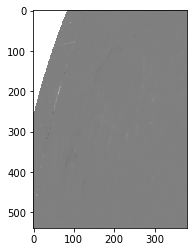

In [353]:
from astropy.io import fits
# fits_image_filename = fits.util.get_testdata_filepath("/SUM44/D642407832/S00000/magnetogram.fits")#s['magnetogram'][0])

hdul = fits.open(s['magnetogram'][0])
hdul.info()
image = fits.getdata(s['magnetogram'][0])
plt.imshow(image, cmap="gray")
print(image)

# plt.figure()
# hdul.plot()
# plt.show()

In [320]:
import sunpy.map
from sunpy.io import fits
from astropy.io import fits
client = drms.Client(email="jhou@lmsal.com")
r = client.export(ds, method='url', protocol='fits')  
data, header = sunpy.io.fits.read(r)[0]#'http://jsoc.stanford.edu'+s['magnetogram'][0])[0] 

header['cunit1'] = 'arcsec' 
header['cunit2'] = 'arcsec' 
# map = sunpy.map.Map(data, header) 
hmi_map = sunpy.map.Map(data, header)

plt.figure()
hmi_map.plot()
plt.show()

OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

In [311]:
client = drms.Client(email="jhou@lmsal.com")
r = client.export(ds, method='url', protocol='fits')  
type(r)

drms.client.ExportRequest

In [312]:
ds

'hmi.sharp_720s[4864][2014.11.30_00:00_TAI]{magnetogram}'

In [201]:
s['magnetogram']

0      /SUM95/D1039223668/S00000/magnetogram.fits
1      /SUM87/D1039223753/S00000/magnetogram.fits
2      /SUM94/D1039223839/S00000/magnetogram.fits
3      /SUM86/D1039223912/S00000/magnetogram.fits
4      /SUM99/D1039223985/S00000/magnetogram.fits
                          ...                    
336    /SUM86/D1039249636/S00000/magnetogram.fits
337    /SUM91/D1039249709/S00000/magnetogram.fits
338    /SUM95/D1039249842/S00000/magnetogram.fits
339    /SUM91/D1039249911/S00000/magnetogram.fits
340    /SUM96/D1039249980/S00000/magnetogram.fits
Name: magnetogram, Length: 341, dtype: object

In [208]:
import drms
client = drms.Client()  
.pkeys('hmi.m_720s')  

In [185]:
"2012-03-07T00:24/720s"[:-7]

'2012-03-07T00:'

In [114]:
import pygmt

fig = pygmt.Figure()
# Use region "d" to specify global region (-180/180/-90/90)
fig.coast(
    region="d",
    projection="Y35/30/12c",
    water="dodgerblue",
    shorelines="thinnest",
    frame="afg",
)
fig.show()

GMTCLibNotFoundError: Error loading GMT shared library at '/Users/jhou/mambaforge/envs/AIA/lib/libgmt.dylib'.
dlopen(/Users/jhou/mambaforge/envs/AIA/lib/libgmt.dylib, 0x0006): Symbol not found: _opj_decoder_set_strict_mode
  Referenced from: /Users/jhou/mambaforge/envs/AIA/lib/libgdal.31.dylib
  Expected in: /Users/jhou/mambaforge/envs/AIA/lib/libopenjp2.2.4.0.dylib
Error loading GMT shared library at 'libgmt.dylib'.
dlopen(libgmt.dylib, 0x0006): Symbol not found: _opj_decoder_set_strict_mode
  Referenced from: /Users/jhou/mambaforge/envs/AIA/lib/libgdal.31.dylib
  Expected in: /Users/jhou/mambaforge/envs/AIA/lib/libopenjp2.2.4.0.dylib

In [127]:
import drms
jsoc = drms.Client()
ds = jsoc.series(r"aia.lev1_euv_12s") # Level 1.0
si = jsoc.info(ds[0])
print(si.segments)
#Choose wavelnth
wavelnth = 94 
k, s = jsoc.query('{0:s}[2018-09-01T00:00/12s][WAVELNTH = {1:03d}]'.format(ds[0],wavelnth), 
                  key='DATE, T_OBS, FSN, DATAMEAN, TEMPCCD, EXPTIME',seg=['image','spikes'])
# s.head() if you want to look at contents of s
dummy, spikes = fits.open('http://jsoc.stanford.edu'+s['spikes'][0])
dummy, image = fits.open('http://jsoc.stanford.edu'+s['image'][0])
image.verify('fix')
print(spikes.data.shape)

       type units       protocol  dims                    note
name                                                          
image   int  None  link via lev1  None       AIA level 1 image
spikes  int  None  link via lev1  None  Cosmic ray information
(3, 2560)


 [astropy.io.fits.verify]


In [128]:
print('http://jsoc.stanford.edu'+s['spikes'][0])

http://jsoc.stanford.edu/SUM85/D1086150227/S00000/spikes.fits


Files Downloaded: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.72file/s]


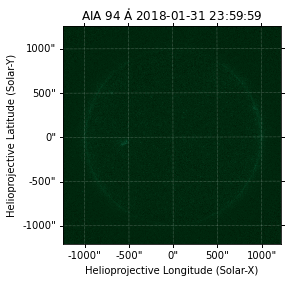

In [129]:
aia_map = sunpy.map.Map('http://jsoc.stanford.edu'+s['image'][0])
plt.figure()
aia_map.plot()
plt.show()

1: do CEA reprojection
2: do DRMS implementation
3: do AR flare assignment
4: do AIA as well
5: do the thing that makes flares appear on movie


In [131]:
with open(f'/sunpy/data/hmi_m_45s012_03_07_01_49_30_tai_magnetogram') as f:
    print(f)

FileNotFoundError: [Errno 2] No such file or directory: '/sunpy/data/hmi_m_45s012_03_07_01_49_30_tai_magnetogram'

In [136]:
res = Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'),
                  a.jsoc.Series('hmi.v_45s'))  

In [137]:
downloads = Fido.fetch(res)

ValueError: A registered email is required to get data from JSOC. Please supply an email with attrs.jsoc.Notify to Fido.search. Then pass those new results back into Fido.fetch

In [287]:
shape_out

(720, 1440)

/Users/jhou/Library/Application Support/sunpy/AIA20110607_063307_0193_lowres.fits


 [sunpy.map.mapbase]


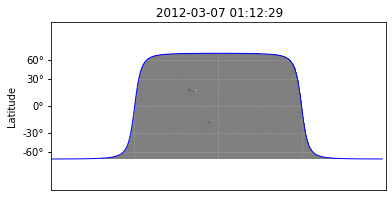

In [299]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map

# yr = 
print(sunpy.data.sample.AIA_193_IMAGE)

# with fopen(f'/Users/jhou/sunpy/data/hmi_m_45s_2012_03_07_01_13_30_tai_magnetogram.fits') as f:
#     print(f)
hmi_map = sunpy.map.Map(f'/Users/jhou/sunpy/data/hmi_m_45s_2012_03_07_01_13_30_tai_magnetogram.fits')

lon, lat = -13, 20


# aia_map = sunpy.map.Map(sunpy.data.sample.AIA_193_IMAGE)

# plt.figure()
# aia_map.plot()
# plt.show()


shape_out = (720, 1440)
frame_out = SkyCoord(-0, 0, unit=u.deg,
                     frame="heliographic_stonyhurst",
                     obstime=hmi_map.date,
                     rsun=hmi_map.coordinate_frame.rsun)
header = sunpy.map.make_fitswcs_header(shape_out,
                                       frame_out,
                                       scale=(360 / shape_out[1],
                                              180 / shape_out[0]) * u.deg / u.pix,
                                       projection_code="CEA")



outmap = hmi_map.reproject_to(header)



plt.figure()
outmap.plot()
outmap.draw_limb(color='blue')

plt.show()

/Users/jhou/Library/Application Support/sunpy/AIA20110607_063307_0193_lowres.fits
-13 20


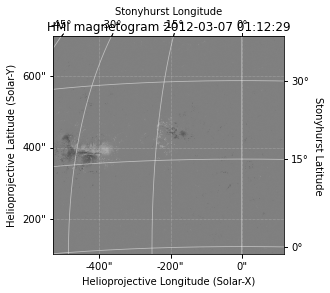

 [sunpy.map.mapbase]


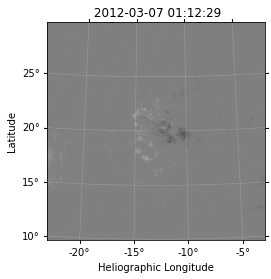

In [295]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map

# yr = 
print(sunpy.data.sample.AIA_193_IMAGE)

# with fopen(f'/Users/jhou/sunpy/data/hmi_m_45s_2012_03_07_01_13_30_tai_magnetogram.fits') as f:
#     print(f)
# aia_map = sunpy.map.Map(f'/Users/jhou/sunpy/data/hmi_m_45s_2012_03_07_01_13_30_tai_magnetogram.fits')

lon, lat = -13, 20
print(lon, lat)
hmi_map = sunpy.map.Map(f'/Users/jhou/sunpy/data/hmi_m_45s_2012_03_07_01_13_30_tai_magnetogram.fits')#sorted_files[i][0])
hmi_rotated = hmi_map.rotate(order=3)
top_right = SkyCoord((lon+20) * u.deg, (lat+20) * u.deg, frame=HeliographicStonyhurst)
bottom_left = SkyCoord((lon-20) * u.deg, (lat-20) * u.deg, frame=HeliographicStonyhurst)
swap_submap = hmi_rotated.submap(bottom_left, top_right=top_right)
plt.figure()
swap_submap.plot()
swap_submap.draw_limb()
swap_submap.draw_grid()
output_dir = "hmiIMGs"
plt.show()

# aia_map = sunpy.map.Map(sunpy.data.sample.AIA_193_IMAGE)

# plt.figure()
# aia_map.plot()
# plt.show()


shape_out = (720, 720)
frame_out = SkyCoord(-13, 20, unit=u.deg,
                     frame="heliographic_stonyhurst",
                     obstime=swap_submap.date,
                     rsun=swap_submap.coordinate_frame.rsun)
header = sunpy.map.make_fitswcs_header(shape_out,
                                       frame_out,
                                       scale=(20 / shape_out[1],
                                              20 / shape_out[0]) * u.deg / u.pix,
                                       projection_code="CEA")



outmap = swap_submap.reproject_to(header)



plt.figure()
outmap.plot()
outmap.draw_limb(color='blue')

plt.show()